#### Dataset

In [1]:
# fruits.zip 
# https://mitu.co.in/dataset

#### Import the libraries

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import matplotlib.pyplot as plt

2026-01-22 13:51:48.635576: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-22 13:51:48.645582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769070108.658733   55542 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769070108.663053   55542 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-22 13:51:48.676627: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

#### Load the data

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255, 
                                   zoom_range=0.2, 
                                  horizontal_flip=True,
                                  vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)

#### Read the images

In [4]:
train = train_datagen.flow_from_directory(
    'fruits/dataset/training_set/', class_mode='binary', target_size=(64,64))

Found 13 images belonging to 2 classes.


In [5]:
test = train_datagen.flow_from_directory(
    'fruits/dataset/test_set/', class_mode='binary', target_size=(64,64))

Found 6 images belonging to 2 classes.


In [6]:
train.filenames

['apple/1.jpg',
 'apple/2.jpeg',
 'apple/3.jpeg',
 'apple/4.jpeg',
 'apple/5.jpg',
 'apple/6.jpg',
 'apple/7.jpg',
 'orange/1.jpeg',
 'orange/2.jpg',
 'orange/3.jpeg',
 'orange/4.jpeg',
 'orange/5.jpg',
 'orange/6.jpg']

In [7]:
train.class_indices

{'apple': 0, 'orange': 1}

#### Build the model

In [8]:
model = Sequential()

model.add(Input((64,64,3)))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2026-01-22 13:51:50.455094: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,849 (202.54 KB)

 Trainable params: 51,849 (202.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

#### Train the model

In [11]:
model.fit(train, epochs=20, batch_size=1)

Epoch 1/20


/home/mitu/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step - accuracy: 0.4615 - loss: 0.7212
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5385 - loss: 0.6867
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7692 - loss: 0.6723
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7692 - loss: 0.6731
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7692 - loss: 0.6529
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9231 - loss: 0.6375
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7692 - loss: 0.6374
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9231 - loss: 0.5998
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.5950
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.5704
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9231 - loss: 0.5666
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9231 - loss: 0.5320
Epoch 13/20

#### Evaluate the model

In [12]:
model.evaluate(test, batch_size=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.3301


/home/mitu/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


[0.33006441593170166, 1.0]

In [13]:
train.class_indices

{'apple': 0, 'orange': 1}

In [14]:
import cv2

Apple


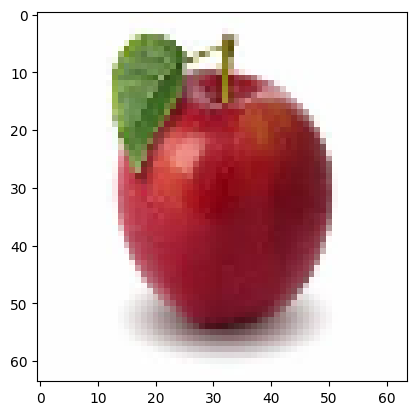

In [15]:
new_img = plt.imread('fruits/dataset/sample2.jpg')
new_img = cv2.resize(new_img, (64,64))
plt.imshow(new_img)
new_img = np.reshape(new_img, (1,64,64,3))
result = model.predict(new_img, verbose=False)
if result[0][0] == 0:
    print("Apple")
else:
    print("Orange")

In [16]:
model.save('classifier.h5')